# Abstract

Hyperparameters are settings that can be tuned to control the behavior of a machine learning algorithm. Conceptually, hyperparameters can be considered orthogonal to the learning model itself in the sense that, although they live outside the model, there is a direct relationship between them. Determining these hyperparameters is tedious and cumbersome task. The main aim of this research is to determine the important hyperparameters with proper tuning values obtained from the dataset. To achieve this, this research leveraged H2O.ai’s module for python called H2O which gives flexibility to run the process for numerous run times. Models are generated by running H2OAutoML for various runtimes (500s, 700s, 900s, 1100s and 1300s).

# What are Hyperparameters?

Hyperparameters are adjustable parameters you choose to train a model that governs the training process itself. For example, to train a deep neural network, you decide the number of hidden layers in the network and the number of nodes in each layer prior to training the model. These values usually stay constant during the training process.

Hyperparameters help answer questions like:

1) The depth of the decision tree.
2) How many trees are required in random forest.
3) How many layers should a neural network have.
4) The learning rate for gradient descent method.

Installing h2o on colab notebook.

In [0]:
!pip install h2o

Importing h20 and h20AutoML libraries.

In [0]:
import h2o
from h2o.automl import H2OAutoML
import json
h2o.init()

Uploading dataset bottle.csv into the colab files folder

In [0]:
# added in case to upload dataset
# from google.colab import files
# uploaded = files.upload()

Saving bottle.csv to bottle.csv


Loading uploaded csv files from the files folder to the dataframe df2. Also, the required libraries are imported.

In [2]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import seaborn as sns
import io
#df2 = pd.read_csv(io.BytesIO(uploaded['bottle.csv']))
df2 = pd.read_csv("bottle.csv")

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (47,73) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [0]:
df2.describe()

,Cst_Cnt,Btl_Cnt,Depthm,T_degC,Salnty,O2ml_L,STheta,O2Sat,Oxy_µmol/Kg,BtlNum,...,R_CHLA,R_PHAEO,R_PRES,R_SAMP,DIC1,DIC2,TA1,TA2,pH2,pH1
count,864863.000000,864863.000000,864863.000000,853900.000000,817509.000000,696201.000000,812174.000000,661274.000000,661268.000000,118667.000000,...,225276.000000,225275.000000,864863.000000,122006.000000,1999.000000,224.000000,2084.000000,234.000000,10.000000,84.000000
mean,17138.790958,432432.000000,226.831951,10.799677,33.840350,3.392468,25.819394,57.103779,148.808694,10.497426,...,0.450225,0.198599,228.395694,162.071521,2153.239714,2168.148330,2256.055845,2278.858803,7.948570,7.910983
std,10240.949817,249664.587267,316.050259,4.243825,0.461843,2.073256,1.167787,37.094137,90.187533,6.189688,...,1.208566,0.376539,319.456731,85.722796,112.995202,154.852332,34.844435,58.496495,0.021216,0.077666
min,1.000000,1.000000,0.000000,1.440000,28.431000,-0.010000,20.934000,-0.100000,-0.434900,0.000000,...,-0.010000,-3.890000,0.000000,0.000000,1948.850000,1969.440000,2181.570000,2198.150000,7.923100,7.618300
25%,8269.000000,216216.500000,46.000000,7.680000,33.488000,1.360000,24.965000,21.100000,60.915470,5.000000,...,0.050000,0.050000,46.000000,200.000000,2028.330000,2008.977500,2230.322500,2229.062500,7.931475,7.898675
50%,16848.000000,432432.000000,125.000000,10.060000,33.863000,3.440000,25.996000,54.400000,151.064150,10.000000,...,0.160000,0.110000,126.000000,206.000000,2170.640000,2265.885000,2244.325000,2247.505000,7.946650,7.928850
75%,26557.000000,648647.500000,300.000000,13.880000,34.196900,5.500000,26.646000,97.600000,240.379600,16.000000,...,0.390000,0.230000,302.000000,214.000000,2253.810000,2315.525000,2278.505000,2316.452500,7.963300,7.955100
max,34404.000000,864863.000000,5351.000000,31.140000,37.034000,11.130000,250.784000,214.100000,485.701800,25.000000,...,66.110000,65.300000,5458.000000,424.000000,2367.800000,2364.420000,2434.900000,2437.000000,7.988300,8.047700


Printing the 5 rows of the dataframe.

In [0]:
df2.head()

,Cst_Cnt,Btl_Cnt,Sta_ID,Depth_ID,Depthm,T_degC,Salnty,O2ml_L,STheta,O2Sat,...,R_PHAEO,R_PRES,R_SAMP,DIC1,DIC2,TA1,TA2,pH2,pH1,DIC Quality Comment
0,1,1,054.0 056.0,19-4903CR-HY-060-0930-05400560-0000A-3,0,10.50,33.440,NaN,25.649,NaN,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2,054.0 056.0,19-4903CR-HY-060-0930-05400560-0008A-3,8,10.46,33.440,NaN,25.656,NaN,...,NaN,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,3,054.0 056.0,19-4903CR-HY-060-0930-05400560-0010A-7,10,10.46,33.437,NaN,25.654,NaN,...,NaN,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,4,054.0 056.0,19-4903CR-HY-060-0930-05400560-0019A-3,19,10.45,33.420,NaN,25.643,NaN,...,NaN,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,5,054.0 056.0,19-4903CR-HY-060-0930-05400560-0020A-7,20,10.45,33.421,NaN,25.643,NaN,...,NaN,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Checking the null values in the dataframe.

In [0]:
df2.isnull().sum()

Cst_Cnt                     0
Btl_Cnt                     0
Sta_ID                      0
Depth_ID                    0
Depthm                      0
T_degC                  10963
Salnty                  47354
O2ml_L                 168662
STheta                  52689
O2Sat                  203589
Oxy_µmol/Kg            203595
BtlNum                 746196
RecInd                      0
T_prec                  10963
T_qual                 841736
S_prec                  47354
S_qual                 789949
P_qual                 191108
O_qual                 680187
SThtaq                 799040
O2Satq                 647066
ChlorA                 639591
Chlqua                 225697
Phaeop                 639592
Phaqua                 225693
PO4uM                  451546
PO4q                   413077
SiO3uM                 510772
SiO3qu                 353997
NO2uM                  527287
                        ...  
MeanAs                 842213
MeanAp                 844406
MeanAq    

Checking the difference between the graphs of each distribution without the missing values vs filled with the mean. If they have a normal distribution (or close to one), make sense fill with the mean, if not, we'll have an unwanted spike in the graph.

Text(0.5, 1.0, 'Fillna with mean')

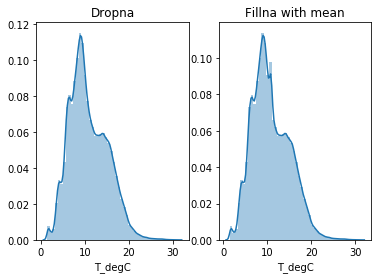

In [0]:
# Let's compare water temperature using fillna() vs mean()
fig, ax=plt.subplots(1,2)
sns.distplot(df2.T_degC.dropna(), ax=ax[0])
ax[0].set_title("Dropna")
sns.distplot(df2.T_degC.fillna(df2.T_degC.mean()), ax=ax[1])
ax[1].set_title("Fillna with mean")

There is not a much difference in both the cases.

Text(0.5, 1.0, 'Fillna mean')

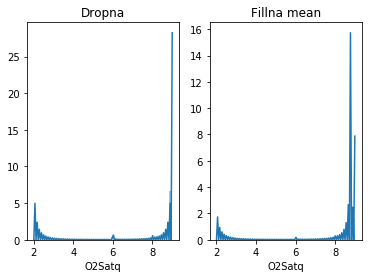

In [0]:
# Let's compare oxygen saturation using fillna() vs mean()
fig, ax=plt.subplots(1,2)
sns.distplot(df2.O2Satq.dropna(), ax=ax[0])
ax[0].set_title("Dropna")
sns.distplot(df2.O2Satq.fillna(df2.O2Satq.mean()), ax=ax[1])
ax[1].set_title("Fillna mean")

There is a spike but there is not a much difference. Lets normalize with Box-Cox to distinguish both the approaches.

Text(0.5, 1.0, 'Norm Fillna mean')

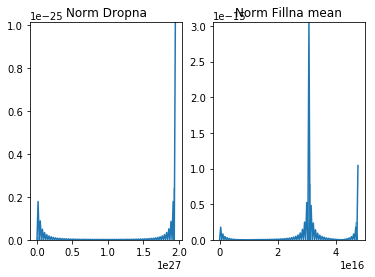

In [0]:
# normalize oxygen sat (w/ Box-Cox)
normalized_ox_dropna = stats.boxcox(df2.O2Satq.dropna())[0]
# normalize oxygen sat (w/ Box-Cox)
normalized_ox_fillna = stats.boxcox(df2.O2Satq.fillna(df2.O2Satq.mean()))[0]

fig, ax=plt.subplots(1,2)
sns.distplot(normalized_ox_dropna, ax=ax[0])
ax[0].set_title("Norm Dropna")
sns.distplot(normalized_ox_fillna, ax=ax[1])
ax[1].set_title("Norm Fillna mean")

We can see a clear difference now! So, in this case, it should be best using .fillna(0), as using .dropna() could lead to errors if you are going to try correlate variables.

In [0]:
# To fimd the percentage of the null values given
total = df2.isnull().sum()[df2.isnull().sum() != 0].sort_values(ascending = False)
percent = pd.Series(round(total/len(df2)*100,2))
pd.concat([total, percent], axis=1, keys=['total_missing', 'percent'])

,total_missing,percent
pH2,864853,100.00
DIC Quality Comment,864808,99.99
pH1,864779,99.99
DIC2,864639,99.97
TA2,864629,99.97
DIC1,862864,99.77
TA1,862779,99.76
C14A2p,852121,98.53
C14A1p,852103,98.52
C14As2,850449,98.33


In [0]:
# changing the notation of the columns
df2.columns = df2.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')
df2

,cst_cnt,btl_cnt,sta_id,depth_id,depthm,t_degc,salnty,o2ml_l,stheta,o2sat,...,r_phaeo,r_pres,r_samp,dic1,dic2,ta1,ta2,ph2,ph1,dic_quality_comment
0,1,1,054.0 056.0,19-4903CR-HY-060-0930-05400560-0000A-3,0,10.500,33.4400,NaN,25.64900,NaN,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2,054.0 056.0,19-4903CR-HY-060-0930-05400560-0008A-3,8,10.460,33.4400,NaN,25.65600,NaN,...,NaN,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,3,054.0 056.0,19-4903CR-HY-060-0930-05400560-0010A-7,10,10.460,33.4370,NaN,25.65400,NaN,...,NaN,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,4,054.0 056.0,19-4903CR-HY-060-0930-05400560-0019A-3,19,10.450,33.4200,NaN,25.64300,NaN,...,NaN,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,5,054.0 056.0,19-4903CR-HY-060-0930-05400560-0020A-7,20,10.450,33.4210,NaN,25.64300,NaN,...,NaN,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1,6,054.0 056.0,19-4903CR-HY-060-0930-05400560-0030A-7,30,10.450,33.4310,NaN,25.65100,NaN,...,NaN,30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,1,7,054.0 056.0,19-4903CR-HY-060-0930-05400560-0039A-3,39,10.450,33.4400,NaN,25.65800,NaN,...,NaN,39,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,1,8,054.0 056.0,19-4903CR-HY-060-0930-05400560-0050A-7,50,10.240,33.4240,NaN,25.68200,NaN,...,NaN,50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,1,9,054.0 056.0,19-4903CR-HY-060-0930-05400560-0058A-3,58,10.060,33.4200,NaN,25.71000,NaN,...,NaN,58,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,1,10,054.0 056.0,19-4903CR-HY-060-0930-05400560-0075A-7,75,9.860,33.4940,NaN,25.80100,NaN,...,NaN,75,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Listing the columns of the dataframe.

In [0]:
list(df2)

['cst_cnt',
 'btl_cnt',
 'sta_id',
 'depth_id',
 'depthm',
 't_degc',
 'salnty',
 'o2ml_l',
 'stheta',
 'o2sat',
 'oxy_µmol/kg',
 'btlnum',
 'recind',
 't_prec',
 't_qual',
 's_prec',
 's_qual',
 'p_qual',
 'o_qual',
 'sthtaq',
 'o2satq',
 'chlora',
 'chlqua',
 'phaeop',
 'phaqua',
 'po4um',
 'po4q',
 'sio3um',
 'sio3qu',
 'no2um',
 'no2q',
 'no3um',
 'no3q',
 'nh3um',
 'nh3q',
 'c14as1',
 'c14a1p',
 'c14a1q',
 'c14as2',
 'c14a2p',
 'c14a2q',
 'darkas',
 'darkap',
 'darkaq',
 'meanas',
 'meanap',
 'meanaq',
 'inctim',
 'lightp',
 'r_depth',
 'r_temp',
 'r_potemp',
 'r_salinity',
 'r_sigma',
 'r_sva',
 'r_dynht',
 'r_o2',
 'r_o2sat',
 'r_sio3',
 'r_po4',
 'r_no3',
 'r_no2',
 'r_nh4',
 'r_chla',
 'r_phaeo',
 'r_pres',
 'r_samp',
 'dic1',
 'dic2',
 'ta1',
 'ta2',
 'ph2',
 'ph1',
 'dic_quality_comment']

Getting null values since there is no values in the whole column so dropped the complete columns.

In [0]:
df2.drop(["BtlNum",
"ChlorA",
"Phaeop",
"SiO3uM",
"NO2uM"], axis=1,inplace=True
)

In [0]:
df2.drop(["MeanAs",
"MeanAp",
"IncTim",
"LightP",
"R_SIO3",
"R_NO3"  , 
"R_NO2" ,   
"R_NH4"   , 
"R_CHLA"  ,
"R_PHAEO" , 
"R_SAMP" ,
"DIC1"  ,  
"DIC2"    , 
"TA1"      ,
"TA2"      ,
"pH2"      ,
"pH1"      ,
"DIC Quality Comment"], axis=1,inplace=True
)

Checking the null values again. And again dropping columns with no columns.

In [6]:
df2.isnull().sum()

Cst_Cnt             0
Btl_Cnt             0
Sta_ID              0
Depth_ID            0
Depthm              0
T_degC          10963
Salnty          47354
O2ml_L         168662
STheta          52689
O2Sat          203589
Oxy_µmol/Kg    203595
RecInd              0
T_prec          10963
T_qual         841736
S_prec          47354
S_qual         789949
P_qual         191108
O_qual         680187
SThtaq         799040
O2Satq         647066
Chlqua         225697
Phaqua         225693
PO4uM          451546
PO4q           413077
SiO3qu         353997
NO2q           335389
NO3uM          527460
NO3q           334930
NH3uM          799901
NH3q            56564
C14As1         850431
C14A1p         852103
C14A1q          16258
C14As2         850449
C14A2p         852121
C14A2q          16240
DarkAs         842214
DarkAp         844406
DarkAq          24423
MeanAq          24424
R_Depth             0
R_TEMP          10963
R_POTEMP        46047
R_SALINITY      47354
R_SIGMA         52856
R_SVA     

In [0]:
df2.drop(['NO3uM','NH3uM','C14As1','C14A1p','C14As2','C14A2p','DarkAs','DarkAp'], axis=1,inplace=True
)

Again checking null values.

In [8]:
df2.isnull().sum()

Cst_Cnt             0
Btl_Cnt             0
Sta_ID              0
Depth_ID            0
Depthm              0
T_degC          10963
Salnty          47354
O2ml_L         168662
STheta          52689
O2Sat          203589
Oxy_µmol/Kg    203595
RecInd              0
T_prec          10963
T_qual         841736
S_prec          47354
S_qual         789949
P_qual         191108
O_qual         680187
SThtaq         799040
O2Satq         647066
Chlqua         225697
Phaqua         225693
PO4uM          451546
PO4q           413077
SiO3qu         353997
NO2q           335389
NO3q           334930
NH3q            56564
C14A1q          16258
C14A2q          16240
DarkAq          24423
MeanAq          24424
R_Depth             0
R_TEMP          10963
R_POTEMP        46047
R_SALINITY      47354
R_SIGMA         52856
R_SVA           52771
R_DYNHT         46657
R_O2           168662
R_O2Sat        198415
R_PO4          451538
R_PRES              0
dtype: int64

Filling the missing values with the mean.

In [0]:
df2=df2.fillna(df2.mean(),inplace=True)
#df2 = df2.groupby(df2.columns, axis = 1).transform(lambda x: x.fillna(x.mean()))

Checking for the duplicate values in each column.

In [3]:
a = df2.isna().sum()
b = pd.DataFrame({'coln':a.index, 'NaN_count':a.values})
percentNA = 0.7

nullPercent = (1-percentNA) * df2.shape[0]
for i in a.index:
    c = (a[i] > nullPercent)
    if (c == True):
        df2.drop(i, axis=1, inplace=True)
        
print("DUPLICATES remaining:  ", df2.duplicated().sum(),"\n")
df2.info()

DUPLICATES remaining:   0 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 864863 entries, 0 to 864862
Data columns (total 32 columns):
Cst_Cnt        864863 non-null int64
Btl_Cnt        864863 non-null int64
Sta_ID         864863 non-null object
Depth_ID       864863 non-null object
Depthm         864863 non-null int64
T_degC         853900 non-null float64
Salnty         817509 non-null float64
O2ml_L         696201 non-null float64
STheta         812174 non-null float64
O2Sat          661274 non-null float64
Oxy_µmol/Kg    661268 non-null float64
RecInd         864863 non-null int64
T_prec         853900 non-null float64
S_prec         817509 non-null float64
P_qual         673755 non-null float64
Chlqua         639166 non-null float64
Phaqua         639170 non-null float64
NH3q           808299 non-null float64
C14A1q         848605 non-null float64
C14A2q         848623 non-null float64
DarkAq         840440 non-null float64
MeanAq         840439 non-null float64
R_Depth      

Exporting the dataframe into new.csv

In [0]:
df2.to_csv('new.csv')

Loading the from new.csv into the dataframe.

In [0]:
# Load data into H2O
df2 = h2o.import_file("new.csv")

Parse progress: |█████████████████████████████████████████████████████████| 100%


Setting the target variable of the dataframe.

In [0]:
target ='T_degC'

Assigning target and independent variables to y and X respectively.

In [0]:
# assign target and inputs for logistic regression
y = target
X = [name for name in df2.columns if name != y]
print(y)
print(X)

T_degC
['Cst_Cnt', 'Btl_Cnt', 'Sta_ID', 'Depth_ID', 'Depthm', 'Salnty', 'O2ml_L', 'STheta', 'O2Sat', 'Oxy_µmol/Kg', 'BtlNum', 'RecInd', 'T_prec', 'T_qual', 'S_prec', 'S_qual', 'P_qual', 'O_qual', 'SThtaq', 'O2Satq', 'ChlorA', 'Chlqua', 'Phaeop', 'Phaqua', 'PO4uM', 'PO4q', 'SiO3uM', 'SiO3qu', 'NO2uM', 'NO2q', 'NO3uM', 'NO3q', 'NH3uM', 'NH3q', 'C14As1', 'C14A1p', 'C14A1q', 'C14As2', 'C14A2p', 'C14A2q', 'DarkAs', 'DarkAp', 'DarkAq', 'MeanAs', 'MeanAp', 'MeanAq', 'IncTim', 'LightP', 'R_Depth', 'R_TEMP', 'R_POTEMP', 'R_SALINITY', 'R_SIGMA', 'R_SVA', 'R_DYNHT', 'R_O2', 'R_O2Sat', 'R_SIO3', 'R_PO4', 'R_NO3', 'R_NO2', 'R_NH4', 'R_CHLA', 'R_PHAEO', 'R_PRES', 'R_SAMP', 'DIC1', 'DIC2', 'TA1', 'TA2', 'pH2', 'pH1', 'DIC Quality Comment']


Initialising the project and run_time.

H2O AutoML:
H2O’s AutoML can be used for automating the machine learning workflow, which includes automatic training and tuning of many models within a user-specified time limit. Stacked Ensembles will be automatically trained on collections of individual models to produce highly predictive ensemble models which, in most cases, will be the top performing models in the AutoML Leaderboard.

In [0]:
project ="automl_test"
run_time=500

Running H2OAutoML for runtime 500s

In [0]:
aml = H2OAutoML(max_runtime_secs=run_time,project_name = project) 
aml.train(x=X,  
           y=y,
           training_frame=df2)

AutoML progress: |████████████████████████████████████████████████████████| 100%


Printing the leaderboard after completion of AutoML.

In [0]:
# view leaderboard
lb = aml.leaderboard
lb.head(rows=lb.nrows)

model_id,mean_residual_deviance,rmse,mse,mae,rmsle
GLM_grid_1_AutoML_20190426_122855_model_1,17.3971,4.17098,17.3971,3.4179,0.381099


Importing datetime and time libraries. Also, initialising the metadata values. Also defining the alphabet function to get the name of the run_id and printing it.

In [0]:
from datetime import datetime
import time
import random, os, sys
data_path=None
all_variables=None
test_path=None
target='T_degC'
nthreads=1 
min_mem_size=6 
max_models=9 
run_time=500
classification=False
scale=False    
balance_threshold=0.2
name=None  
analysis=0

def alphabet(n):
  alpha='0123456789abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ'    
  str=''
  r=len(alpha)-1   
  while len(str)<n:
    i=random.randint(0,r)
    str+=alpha[i]   
  return str

run_id=alphabet(9)
if server_path==None:
  server_path=os.path.abspath(os.curdir)
os.chdir(server_path) 
run_dir = os.path.join(server_path,run_id)
os.mkdir(run_dir)
os.chdir(run_dir)    

# run_id to std out
print (run_id)

ixTc9NUro


Defining the set_meta_data function and passing the initialised parameters into the function.

In [0]:
def set_meta_data(analysis,run_id,server,data,test,model_path,target,run_time,classification,scale,model,balance,balance_threshold,name,path,nthreads,min_mem_size):
  m_data={}
  m_data['start_time'] = time.time()
  m_data['target']=target
  m_data['server_path']=server
  m_data['data_path']=data 
  m_data['test_path']=test
  m_data['max_models']=model
  m_data['run_time']=run_time
  m_data['run_id'] =run_id
  m_data['scale']=scale
  m_data['classification']=classification
  m_data['scale']=False
  m_data['model_path']=model_path
  m_data['balance']=balance
  m_data['balance_threshold']=balance_threshold
  m_data['project'] =project
  m_data['end_time'] = time.time()
  m_data['execution_time'] = 0.0
  m_data['run_path'] =path
  m_data['nthreads'] = nthreads
  m_data['min_mem_size'] = min_mem_size
  m_data['analysis'] = analysis
  return m_data

Running the meta_data and printing the returned value.

In [0]:
# meta data
meta_data = set_meta_data(analysis, run_id,server_path,data_path,test_path,model_path,target,run_time,classification,scale,max_models,balance_y,balance_threshold,name,run_dir,nthreads,min_mem_size)
print(meta_data)

{'start_time': 1556282264.491477, 'target': 'T_degC', 'server_path': '/content', 'data_path': None, 'test_path': None, 'max_models': 9, 'run_time': 500, 'run_id': 'ixTc9NUro', 'scale': False, 'classification': False, 'model_path': None, 'balance': False, 'balance_threshold': 0.2, 'project': None, 'end_time': 1556282264.4914806, 'execution_time': 0.0, 'run_path': '/content/ixTc9NUro', 'nthreads': 1, 'min_mem_size': 6, 'analysis': 0}


Assigning the leaderboard metrix to a dataframe and assigning the model_id column to model_set.

In [0]:
aml_leaderboard_df=aml.leaderboard.as_data_frame()
model_set=aml_leaderboard_df['model_id']
# Get model ids for all models in the AutoML Leaderboard
type(model_set)

pandas.core.series.Series

Adding all the parameters of each model in the jsonDicts of datatype dictionary

---



In [0]:
jsonDicts= []
for id in model_set.iteritems():
  id,model_name = id
  #print(model_name)
  mod_best=h2o.get_model(model_name)
  jsonDicts.append(mod_best.params)

Printing jsonDicts

In [0]:
print(jsonDicts)

[{'model_id': {'default': None, 'actual': {'__meta': {'schema_version': 3, 'schema_name': 'ModelKeyV3', 'schema_type': 'Key<Model>'}, 'name': 'GLM_grid_1_AutoML_20190426_122855_model_1', 'type': 'Key<Model>', 'URL': '/3/Models/GLM_grid_1_AutoML_20190426_122855_model_1'}}, 'training_frame': {'default': None, 'actual': {'__meta': {'schema_version': 3, 'schema_name': 'FrameKeyV3', 'schema_type': 'Key<Frame>'}, 'name': 'automl_training_bottle_210.hex', 'type': 'Key<Frame>', 'URL': '/3/Frames/automl_training_bottle_210.hex'}}, 'validation_frame': {'default': None, 'actual': None}, 'nfolds': {'default': 0, 'actual': 5}, 'seed': {'default': -1, 'actual': 938480338470996110}, 'keep_cross_validation_models': {'default': True, 'actual': False}, 'keep_cross_validation_predictions': {'default': False, 'actual': True}, 'keep_cross_validation_fold_assignment': {'default': False, 'actual': False}, 'fold_assignment': {'default': 'AUTO', 'actual': 'Modulo'}, 'fold_column': {'default': None, 'actual': N

Defining the function hyperparameter_json and exporting the jason and csv files.

In [0]:
def hyperparameter_json(jsonDicts,name):
    i = json.dumps(jsonDicts, indent=4)
    f = open(name, 'w')
    print(i, file=f)
    f.close()
# hyperparameters = mod_best.params
name='Base_Annualized_Salary_hyperparameters.json'
hyperparameter_json(jsonDicts,'hyperparameters_500.json') 
hyperparameter_json(meta_data,'meta_data_500.json') 
leaderboard_stats=run_id+'lb_500.csv'
aml_leaderboard_df.to_csv(leaderboard_stats)

Repeating the process for runtime 700s

In [0]:
project ="automl_test"
run_time=700

In [0]:
aml = H2OAutoML(max_runtime_secs=run_time,project_name = project) 
aml.train(x=X,  
           y=y,
           training_frame=df2) 

AutoML progress: |████████████████████████████████████████████████████████| 100%


In [0]:
# view leaderboard
lb = aml.leaderboard
lb.head(rows=lb.nrows)

model_id,mean_residual_deviance,rmse,mse,mae,rmsle
GLM_grid_1_AutoML_20190426_122855_model_1,17.3971,4.17098,17.3971,3.4179,0.381099
GLM_grid_1_AutoML_20190426_123745_model_1,17.3971,4.17098,17.3971,3.4179,0.381099


In [0]:
run_id=alphabet(9)
if server_path==None:
  server_path=os.path.abspath(os.curdir)
os.chdir(server_path) 
run_dir = os.path.join(server_path,run_id)
os.mkdir(run_dir)
os.chdir(run_dir)    

# run_id to std out
print (run_id)

F8Cwp4Hkc


In [0]:
# meta data
meta_data = set_meta_data(analysis, run_id,server_path,data_path,test_path,model_path,target,run_time,classification,scale,max_models,balance_y,balance_threshold,name,run_dir,nthreads,min_mem_size)
print(meta_data)

{'start_time': 1556282985.4346933, 'target': 'T_degC', 'server_path': '/content', 'data_path': None, 'test_path': None, 'max_models': 9, 'run_time': 700, 'run_id': 'F8Cwp4Hkc', 'scale': False, 'classification': False, 'model_path': None, 'balance': False, 'balance_threshold': 0.2, 'project': 'Base_Annualized_Salary_hyperparameters.json', 'end_time': 1556282985.434697, 'execution_time': 0.0, 'run_path': '/content/F8Cwp4Hkc', 'nthreads': 1, 'min_mem_size': 6, 'analysis': 0}


In [0]:
aml_leaderboard_df=aml.leaderboard.as_data_frame()
model_set=aml_leaderboard_df['model_id']
# Get model ids for all models in the AutoML Leaderboard
type(model_set)

pandas.core.series.Series

In [0]:
jsonDicts= []
for id in model_set.iteritems():
  id,model_name = id
  #print(model_name)
  mod_best=h2o.get_model(model_name)
  jsonDicts.append(mod_best.params)

In [0]:
print(jsonDicts)

[{'model_id': {'default': None, 'actual': {'__meta': {'schema_version': 3, 'schema_name': 'ModelKeyV3', 'schema_type': 'Key<Model>'}, 'name': 'GLM_grid_1_AutoML_20190426_122855_model_1', 'type': 'Key<Model>', 'URL': '/3/Models/GLM_grid_1_AutoML_20190426_122855_model_1'}}, 'training_frame': {'default': None, 'actual': {'__meta': {'schema_version': 3, 'schema_name': 'FrameKeyV3', 'schema_type': 'Key<Frame>'}, 'name': 'automl_training_bottle_210.hex', 'type': 'Key<Frame>', 'URL': '/3/Frames/automl_training_bottle_210.hex'}}, 'validation_frame': {'default': None, 'actual': None}, 'nfolds': {'default': 0, 'actual': 5}, 'seed': {'default': -1, 'actual': 938480338470996110}, 'keep_cross_validation_models': {'default': True, 'actual': False}, 'keep_cross_validation_predictions': {'default': False, 'actual': True}, 'keep_cross_validation_fold_assignment': {'default': False, 'actual': False}, 'fold_assignment': {'default': 'AUTO', 'actual': 'Modulo'}, 'fold_column': {'default': None, 'actual': N

In [0]:
def hyperparameter_json(jsonDicts,name):
    i = json.dumps(jsonDicts, indent=4)
    f = open(name, 'w')
    print(i, file=f)
    f.close()
# hyperparameters = mod_best.params
name='Base_Annualized_Salary_hyperparameters.json'
hyperparameter_json(jsonDicts,'hyperparameters_700.json') 
hyperparameter_json(meta_data,'meta_data_700.json') 
leaderboard_stats=run_id+'lb_700.csv'
aml_leaderboard_df.to_csv(leaderboard_stats)

Repeating the process for runtime 900s

In [0]:
project ="automl_test"
run_time=900

In [0]:
aml = H2OAutoML(max_runtime_secs=run_time,project_name = project) 
aml.train(x=X,  
           y=y,
           training_frame=df2)

AutoML progress: |████████████████████████████████████████████████████████| 100%


In [0]:
# view leaderboard
lb = aml.leaderboard
lb.head(rows=lb.nrows)

model_id,mean_residual_deviance,rmse,mse,mae,rmsle
GLM_grid_1_AutoML_20190426_122855_model_1,17.3971,4.17098,17.3971,3.4179,0.381099
GLM_grid_1_AutoML_20190426_123745_model_1,17.3971,4.17098,17.3971,3.4179,0.381099
GLM_grid_1_AutoML_20190426_124945_model_1,17.3971,4.17098,17.3971,3.4179,0.381099


In [0]:
run_id=alphabet(9)
if server_path==None:
  server_path=os.path.abspath(os.curdir)
os.chdir(server_path) 
run_dir = os.path.join(server_path,run_id)
os.mkdir(run_dir)
os.chdir(run_dir)    

# run_id to std out
print (run_id)

zXTui81aC


In [0]:
# meta data
meta_data = set_meta_data(analysis, run_id,server_path,data_path,test_path,model_path,target,run_time,classification,scale,max_models,balance_y,balance_threshold,name,run_dir,nthreads,min_mem_size)
print(meta_data)

{'start_time': 1556283897.860452, 'target': 'T_degC', 'server_path': '/content', 'data_path': None, 'test_path': None, 'max_models': 9, 'run_time': 900, 'run_id': 'zXTui81aC', 'scale': False, 'classification': False, 'model_path': None, 'balance': False, 'balance_threshold': 0.2, 'project': 'Base_Annualized_Salary_hyperparameters.json', 'end_time': 1556283897.860456, 'execution_time': 0.0, 'run_path': '/content/zXTui81aC', 'nthreads': 1, 'min_mem_size': 6, 'analysis': 0}


In [0]:
aml_leaderboard_df=aml.leaderboard.as_data_frame()
model_set=aml_leaderboard_df['model_id']
# Get model ids for all models in the AutoML Leaderboard
type(model_set)

pandas.core.series.Series

In [0]:
jsonDicts= []
for id in model_set.iteritems():
  id,model_name = id
  #print(model_name)
  mod_best=h2o.get_model(model_name)
  jsonDicts.append(mod_best.params)

In [0]:
print(jsonDicts)

[{'model_id': {'default': None, 'actual': {'__meta': {'schema_version': 3, 'schema_name': 'ModelKeyV3', 'schema_type': 'Key<Model>'}, 'name': 'GLM_grid_1_AutoML_20190426_122855_model_1', 'type': 'Key<Model>', 'URL': '/3/Models/GLM_grid_1_AutoML_20190426_122855_model_1'}}, 'training_frame': {'default': None, 'actual': {'__meta': {'schema_version': 3, 'schema_name': 'FrameKeyV3', 'schema_type': 'Key<Frame>'}, 'name': 'automl_training_bottle_210.hex', 'type': 'Key<Frame>', 'URL': '/3/Frames/automl_training_bottle_210.hex'}}, 'validation_frame': {'default': None, 'actual': None}, 'nfolds': {'default': 0, 'actual': 5}, 'seed': {'default': -1, 'actual': 938480338470996110}, 'keep_cross_validation_models': {'default': True, 'actual': False}, 'keep_cross_validation_predictions': {'default': False, 'actual': True}, 'keep_cross_validation_fold_assignment': {'default': False, 'actual': False}, 'fold_assignment': {'default': 'AUTO', 'actual': 'Modulo'}, 'fold_column': {'default': None, 'actual': N

In [0]:
def hyperparameter_json(jsonDicts,name):
    i = json.dumps(jsonDicts, indent=4)
    f = open(name, 'w')
    print(i, file=f)
    f.close()
# hyperparameters = mod_best.params
name='Base_Annualized_Salary_hyperparameters.json'
hyperparameter_json(jsonDicts,'hyperparameters_900.json') 
hyperparameter_json(meta_data,'meta_data_900.json') 
leaderboard_stats=run_id+'lb_900.csv'
aml_leaderboard_df.to_csv(leaderboard_stats)

Repeating the process for runtime 1100s

In [0]:
project ="automl_test"
run_time=1100

In [0]:
aml = H2OAutoML(max_runtime_secs=run_time,project_name = project) 
aml.train(x=X,  
           y=y,
           training_frame=df2)

AutoML progress: |████████████████████████████████████████████████████████| 100%


In [0]:
# view leaderboard
lb = aml.leaderboard
lb.head(rows=lb.nrows)

model_id,mean_residual_deviance,rmse,mse,mae,rmsle
GLM_grid_1_AutoML_20190426_122855_model_1,17.3971,4.17098,17.3971,3.4179,0.381099
GLM_grid_1_AutoML_20190426_130458_model_1,17.3971,4.17098,17.3971,3.4179,0.381099
GLM_grid_1_AutoML_20190426_124945_model_1,17.3971,4.17098,17.3971,3.4179,0.381099
GLM_grid_1_AutoML_20190426_123745_model_1,17.3971,4.17098,17.3971,3.4179,0.381099


In [0]:
run_id=alphabet(9)
if server_path==None:
  server_path=os.path.abspath(os.curdir)
os.chdir(server_path) 
run_dir = os.path.join(server_path,run_id)
os.mkdir(run_dir)
os.chdir(run_dir)    

# run_id to std out
print (run_id)

e9dht3vta


In [0]:
# meta data
meta_data = set_meta_data(analysis, run_id,server_path,data_path,test_path,model_path,target,run_time,classification,scale,max_models,balance_y,balance_threshold,name,run_dir,nthreads,min_mem_size)
print(meta_data)

{'start_time': 1556285040.9804027, 'target': 'T_degC', 'server_path': '/content', 'data_path': None, 'test_path': None, 'max_models': 9, 'run_time': 1100, 'run_id': 'e9dht3vta', 'scale': False, 'classification': False, 'model_path': None, 'balance': False, 'balance_threshold': 0.2, 'project': 'Base_Annualized_Salary_hyperparameters.json', 'end_time': 1556285040.9804065, 'execution_time': 0.0, 'run_path': '/content/e9dht3vta', 'nthreads': 1, 'min_mem_size': 6, 'analysis': 0}


In [0]:
aml_leaderboard_df=aml.leaderboard.as_data_frame()
model_set=aml_leaderboard_df['model_id']
# Get model ids for all models in the AutoML Leaderboard
type(model_set)

pandas.core.series.Series

In [0]:
jsonDicts= []
for id in model_set.iteritems():
  id,model_name = id
  #print(model_name)
  mod_best=h2o.get_model(model_name)
  jsonDicts.append(mod_best.params)

In [0]:
print(jsonDicts)

[{'model_id': {'default': None, 'actual': {'__meta': {'schema_version': 3, 'schema_name': 'ModelKeyV3', 'schema_type': 'Key<Model>'}, 'name': 'GLM_grid_1_AutoML_20190426_122855_model_1', 'type': 'Key<Model>', 'URL': '/3/Models/GLM_grid_1_AutoML_20190426_122855_model_1'}}, 'training_frame': {'default': None, 'actual': {'__meta': {'schema_version': 3, 'schema_name': 'FrameKeyV3', 'schema_type': 'Key<Frame>'}, 'name': 'automl_training_bottle_210.hex', 'type': 'Key<Frame>', 'URL': '/3/Frames/automl_training_bottle_210.hex'}}, 'validation_frame': {'default': None, 'actual': None}, 'nfolds': {'default': 0, 'actual': 5}, 'seed': {'default': -1, 'actual': 938480338470996110}, 'keep_cross_validation_models': {'default': True, 'actual': False}, 'keep_cross_validation_predictions': {'default': False, 'actual': True}, 'keep_cross_validation_fold_assignment': {'default': False, 'actual': False}, 'fold_assignment': {'default': 'AUTO', 'actual': 'Modulo'}, 'fold_column': {'default': None, 'actual': N

In [0]:
def hyperparameter_json(jsonDicts,name):
    i = json.dumps(jsonDicts, indent=4)
    f = open(name, 'w')
    print(i, file=f)
    f.close()
# hyperparameters = mod_best.params
name='Base_Annualized_Salary_hyperparameters.json'
hyperparameter_json(jsonDicts,'hyperparameters_1100.json') 
hyperparameter_json(meta_data,'meta_data_1100.json') 
leaderboard_stats=run_id+'lb_1100.csv'
aml_leaderboard_df.to_csv(leaderboard_stats)

Repeating the process for runtime 1300s

In [0]:
project ="automl_test"
run_time=1300

In [0]:
aml = H2OAutoML(max_runtime_secs=run_time,project_name = project) 
aml.train(x=X,  
           y=y,
           training_frame=df2)

AutoML progress: |████████████████████████████████████████████████████████| 100%


In [0]:
# view leaderboard
lb = aml.leaderboard
lb.head(rows=lb.nrows)

model_id,mean_residual_deviance,rmse,mse,mae,rmsle
GLM_grid_1_AutoML_20190426_122855_model_1,17.3971,4.17098,17.3971,3.4179,0.381099
GLM_grid_1_AutoML_20190426_130458_model_1,17.3971,4.17098,17.3971,3.4179,0.381099
GLM_grid_1_AutoML_20190426_124945_model_1,17.3971,4.17098,17.3971,3.4179,0.381099
GLM_grid_1_AutoML_20190426_132401_model_1,17.3971,4.17098,17.3971,3.4179,0.381099
GLM_grid_1_AutoML_20190426_123745_model_1,17.3971,4.17098,17.3971,3.4179,0.381099


In [0]:
run_id=alphabet(9)
if server_path==None:
  server_path=os.path.abspath(os.curdir)
os.chdir(server_path) 
run_dir = os.path.join(server_path,run_id)
os.mkdir(run_dir)
os.chdir(run_dir)    

# run_id to std out
print (run_id)

rYxUGslgd


In [0]:
# meta data
meta_data = set_meta_data(analysis, run_id,server_path,data_path,test_path,model_path,target,run_time,classification,scale,max_models,balance_y,balance_threshold,name,run_dir,nthreads,min_mem_size)
print(meta_data)

{'start_time': 1556286366.229483, 'target': 'T_degC', 'server_path': '/content', 'data_path': None, 'test_path': None, 'max_models': 9, 'run_time': 1300, 'run_id': 'rYxUGslgd', 'scale': False, 'classification': False, 'model_path': None, 'balance': False, 'balance_threshold': 0.2, 'project': 'Base_Annualized_Salary_hyperparameters.json', 'end_time': 1556286366.2294886, 'execution_time': 0.0, 'run_path': '/content/rYxUGslgd', 'nthreads': 1, 'min_mem_size': 6, 'analysis': 0}


In [0]:
aml_leaderboard_df=aml.leaderboard.as_data_frame()
model_set=aml_leaderboard_df['model_id']
# Get model ids for all models in the AutoML Leaderboard
type(model_set)

pandas.core.series.Series

In [0]:
jsonDicts= []
for id in model_set.iteritems():
  id,model_name = id
  #print(model_name)
  mod_best=h2o.get_model(model_name)
  jsonDicts.append(mod_best.params)

In [0]:
print(jsonDicts)

[{'model_id': {'default': None, 'actual': {'__meta': {'schema_version': 3, 'schema_name': 'ModelKeyV3', 'schema_type': 'Key<Model>'}, 'name': 'GLM_grid_1_AutoML_20190426_122855_model_1', 'type': 'Key<Model>', 'URL': '/3/Models/GLM_grid_1_AutoML_20190426_122855_model_1'}}, 'training_frame': {'default': None, 'actual': {'__meta': {'schema_version': 3, 'schema_name': 'FrameKeyV3', 'schema_type': 'Key<Frame>'}, 'name': 'automl_training_bottle_210.hex', 'type': 'Key<Frame>', 'URL': '/3/Frames/automl_training_bottle_210.hex'}}, 'validation_frame': {'default': None, 'actual': None}, 'nfolds': {'default': 0, 'actual': 5}, 'seed': {'default': -1, 'actual': 938480338470996110}, 'keep_cross_validation_models': {'default': True, 'actual': False}, 'keep_cross_validation_predictions': {'default': False, 'actual': True}, 'keep_cross_validation_fold_assignment': {'default': False, 'actual': False}, 'fold_assignment': {'default': 'AUTO', 'actual': 'Modulo'}, 'fold_column': {'default': None, 'actual': N

In [0]:
def hyperparameter_json(jsonDicts,name):
    i = json.dumps(jsonDicts, indent=4)
    f = open(name, 'w')
    print(i, file=f)
    f.close()
# hyperparameters = mod_best.params
name='Base_Annualized_Salary_hyperparameters.json'
hyperparameter_json(jsonDicts,'hyperparameters_1300.json') 
hyperparameter_json(meta_data,'meta_data_1300.json') 
leaderboard_stats=run_id+'lb_1300.csv'
aml_leaderboard_df.to_csv(leaderboard_stats)

In [0]:
# Create a default model
model = lgb.LGBMModel()
model.get_params()

NameError: ignored

In [0]:
#Shutting down h20
h2o.cluster().shutdown()

H2O session closed.

# Link of Datset

https://www.kaggle.com/sohier/calcofi

# Conclusion

In data cleaning, We have substituted null values with the mean value and dropped the columns with no values.
Ran H2OAutoML for different runtimes and generated Hyperparameters.json file, metadata.json file and leaderboard.csv for different runtimes. 
Each Algorithm used to generate different models at different runtimes have common hyperparameters. Following Analysis has been done on the generated files in the separate notebook(Analysis.ipynb).
1. Trying to find the important hyperparameters
2. Trying to find the range of hyperparameters
3. Compare the range of values across the models for different hyperparameters



# Contribution

percentage ratio - 80: 20

Self - 80%

External - 20%

# Citation

https://github.com/prabhuSub/Hyperparamter-Samples

https://github.com/nikbearbrown/CSYE_7245/tree/master/H2O

# License

Copyright (c) 2019 FNU Karan

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.

# References

1. https://github.com/skunkworksneu/IIT-AGNE-Workshop
2. https://github.com/prabhuSub/Hyperparamter-Samples